In [94]:
from fem_1d_for_students import *

Text(0, 0.5, '$u_{h,x}$')

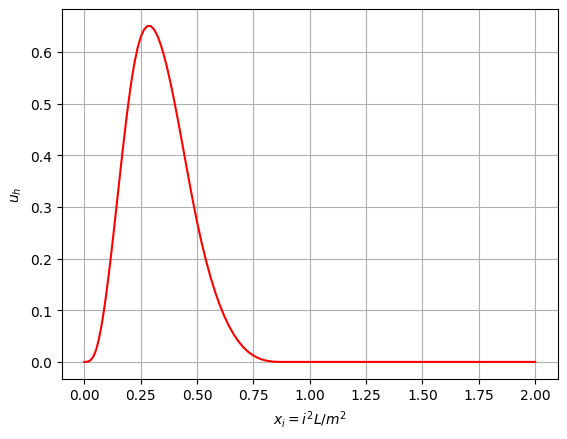

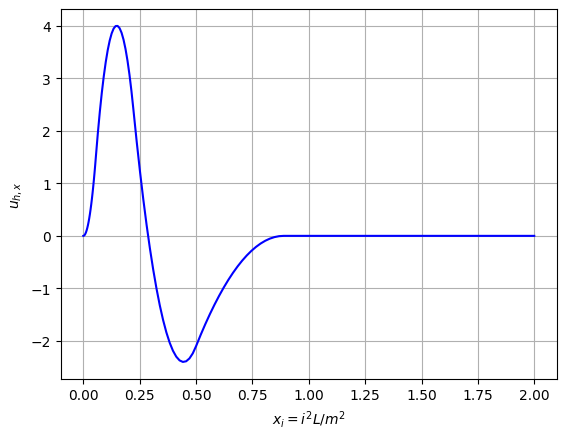

In [102]:
m = 6
p = 3
k = 2
L = 2

neval = 20
x = np.zeros(m+1)

for i in range(0,m+1):
    x[i] = i**(2)*L/m**(2)

with open('coefficients.txt', 'r') as file:
        coefficients = [float(line.strip()) for line in file]
u = np.array(coefficients)

u = np.zeros(m *(p+1) - (m-1)*(k+1))
u[3] = 1
def evaluate_solution(p,k,neval,u, x):
    mesh = create_mesh(brk = x)
    param_map = create_param_map(mesh = mesh)
    fe_space = create_fe_space(deg = p, reg = k, mesh = mesh)
    ref_data = create_ref_data(neval = neval, deg = p, integrate= False)

    reference_basis = ref_data['reference_basis']
    reference_basis_derivatives =  ref_data['reference_basis_derivatives']

    n = fe_space['n']
    extraction_coefficients = fe_space['extraction_coefficients']
    supported_bases = fe_space['supported_bases']
    elements = mesh['elements']
    m = mesh['m']

    

    x_eval = np.zeros([mesh['m'], neval])
    u_eval = np.zeros([mesh['m'], neval])
    du_dx_eval = np.zeros([mesh['m'], neval])
    du_dx = param_map['imap_derivatives']

    for element_index, element in enumerate(mesh['elements'].T):
        x_eval[element_index, :] = np.linspace(element[0], element[-1], neval)
        u_eval[element_index, :] = u[supported_bases[element_index]] @ (extraction_coefficients[element_index][:][:] @ reference_basis)
        du_dx_eval[element_index, :] = u[supported_bases[element_index]] @ (extraction_coefficients[element_index][:][:] @ reference_basis_derivatives) * du_dx[element_index]

    return x_eval.flatten(), u_eval.flatten(), du_dx_eval.flatten()

x_eval, u_eval, du_dx_eval = evaluate_solution(p,k,neval,u, x)
plt.figure()    
plt.plot(x_eval, u_eval, 'r-')
plt.grid()
plt.xlabel(r'$x_i = i^2 L/m^2$')
plt.ylabel(r'$u_h$')

plt.figure()
plt.plot(x_eval.T, du_dx_eval.T, 'b-')
plt.grid()
plt.xlabel(r'$x_i = i^2 L/m^2$')
plt.ylabel(r'$u_{h,x}$')


In [96]:
m = 5
p = 2
k = 1
L = 2

neval = 20
x = np.linspace(0,2, m )
mesh = create_mesh(brk = x)
param_map = create_param_map(mesh = mesh)
fe_space = create_fe_space(deg = p, reg = k, mesh = mesh)
ref_data = create_ref_data(neval = neval, deg = p, integrate= False)

reference_basis = ref_data['reference_basis']
reference_basis_derivatives =  ref_data['reference_basis_derivatives']

n = fe_space['n']
extraction_coefficients = fe_space['extraction_coefficients']
supported_bases = fe_space['supported_bases']
elements = mesh['elements']
m = mesh['m']
element_index = 3 
extraction_coefficients[element_index][:]

array([[0.5, 0. , 0. ],
       [0.5, 1. , 0. ],
       [0. , 0. , 1. ]])

In [97]:
def u_h(coefficients, mesh, fe_space, ref_data):
    m = mesh['m']
    elements = mesh['elements']
    reference_basis = ref_data['reference_basis']
    reference_basis_derivatives = ref_data['reference_basis_derivatives']
    extraction_coefficients = ref_data['extraction_coefficients']
    domain = np.linspace(elements[0,0], elements[-1,-1]. m*neval)
    for index in range(m):
        
        print(extraction_coefficients[index][0][0] * reference_basis[0]+ extraction_coefficients[index][1][0] * reference_basis[1])
        print(extraction_coefficients[index][0][1] * reference_basis[0] + extraction_coefficients[index][1][1] * reference_basis[1])

    return u_h, domain

In [98]:
m = 4
p = 1
k = 0
L = 2

neval = 3
x = np.linspace(0,L,m+1)
mesh = create_mesh(brk = x)
ref_data = create_ref_data(neval, deg = p, integrate = True)
space = create_fe_space(p, k, mesh)
param_map = create_param_map(mesh)


evaluation_points = ref_data['evaluation_points']
quadrature_weight = ref_data['quadrature_weights']

extraction_coefficients = space['extraction_coefficients']

reference_basis = ref_data['reference_basis']
reference_basis_derivatives = ref_data['reference_basis_derivatives']

n = space['n']
A = np.zeros((n,n))
b = np.zeros(n)
print(np.shape(extraction_coefficients))

for l in range(0,m):
    supported_bases = space['supported_bases'][l]
    element = mesh['elements'][:,l]
    x_l = np.linspace(element[0], element[-1], neval)
    for i, basis_i in enumerate(supported_bases):
        N_i = np.dot(extraction_coefficients[l][i, :], reference_basis)
        dN_i = np.dot(extraction_coefficients[l][i, :], reference_basis_derivatives * param_map['imap_derivatives'][l])
        for j, basis_j in enumerate(supported_bases):
            N_j = np.dot(extraction_coefficients[l][j, :], reference_basis)
            dN_j = np.dot(extraction_coefficients[l][j, :], reference_basis_derivatives * param_map['imap_derivatives'][l])
            value = 0
            for r in range(0, neval):
                value += problem_B(x, N_i[r], dN_i[r], N_j[r], dN_j[r]) * param_map['map_derivatives'][l] * quadrature_weight[r] 
            A[basis_i,basis_j] += value
        value = 0 
        for r in range(0,neval):
            value += 1 * problem_L(x, N_i[r], dN_i[r]) * param_map['map_derivatives'][l] * quadrature_weight[r] 
        
        b[basis_i] +=value 
    
    b+= -0*A[:,0] -1*A[:,-1] 
print(A)
print(b)
ref_data = create_ref_data(neval, deg = p, integrate = True)
space = create_fe_space(p, k, mesh)
param_map = create_param_map(mesh)


evaluation_points = ref_data['evaluation_points']
quadrature_weight = ref_data['quadrature_weights']

extraction_coefficients = space['extraction_coefficients']

reference_basis = ref_data['reference_basis']
reference_basis_derivatives = ref_data['reference_basis_derivatives']

n = space['n']
A = np.zeros((n,n))
b = np.zeros(n)
print(np.shape(extraction_coefficients))

for l in range(0,m):
    supported_bases = space['supported_bases'][l]
    element = mesh['elements'][:,l]
    x_l = np.linspace(element[0], element[-1], neval)
    for i, basis_i in enumerate(supported_bases):
        N_i = np.dot(extraction_coefficients[l][i, :], reference_basis)
        dN_i = np.dot(extraction_coefficients[l][i, :], reference_basis_derivatives * param_map['imap_derivatives'][l])
        for j, basis_j in enumerate(supported_bases):
            N_j = np.dot(extraction_coefficients[l][j, :], reference_basis)
            dN_j = np.dot(extraction_coefficients[l][j, :], reference_basis_derivatives * param_map['imap_derivatives'][l])
            value = 0
            for r in range(0, neval):
                value += problem_B(x, N_i[r], dN_i[r], N_j[r], dN_j[r]) * param_map['map_derivatives'][l] * quadrature_weight[r] 
            A[basis_i,basis_j] += value
        value = 0 
        for r in range(0,neval):
            value += 1 * problem_L(x, N_i[r], dN_i[r]) * param_map['map_derivatives'][l] * quadrature_weight[r] 
        
        b[basis_i] +=value 
    
    b+= -0*A[:,0] -1*A[:,-1] 
print(A)
print(b)
ref_data = create_ref_data(neval, deg = p, integrate = True)
space = create_fe_space(p, k, mesh)
param_map = create_param_map(mesh)


evaluation_points = ref_data['evaluation_points']
quadrature_weight = ref_data['quadrature_weights']

extraction_coefficients = space['extraction_coefficients']

reference_basis = ref_data['reference_basis']
reference_basis_derivatives = ref_data['reference_basis_derivatives']

n = space['n']
A = np.zeros((n,n))
b = np.zeros(n)
print(np.shape(extraction_coefficients))

for l in range(0,m):
    supported_bases = space['supported_bases'][l]
    element = mesh['elements'][:,l]
    x_l = np.linspace(element[0], element[-1], neval)
    for i, basis_i in enumerate(supported_bases):
        N_i = np.dot(extraction_coefficients[l][i, :], reference_basis)
        dN_i = np.dot(extraction_coefficients[l][i, :], reference_basis_derivatives * param_map['imap_derivatives'][l])
        for j, basis_j in enumerate(supported_bases):
            N_j = np.dot(extraction_coefficients[l][j, :], reference_basis)
            dN_j = np.dot(extraction_coefficients[l][j, :], reference_basis_derivatives * param_map['imap_derivatives'][l])
            value = 0
            for r in range(0, neval):
                value += problem_B(x, N_i[r], dN_i[r], N_j[r], dN_j[r]) * param_map['map_derivatives'][l] * quadrature_weight[r] 
            A[basis_i,basis_j] += value
        value = 0 
        for r in range(0,neval):
            value += 1 * problem_L(x, N_i[r], dN_i[r]) * param_map['map_derivatives'][l] * quadrature_weight[r] 
        
        b[basis_i] +=value 
    
    b+= -0*A[:,0] -1*A[:,-1] 
print(A)
print(b)
ref_data = create_ref_data(neval, deg = p, integrate = True)
space = create_fe_space(p, k, mesh)
param_map = create_param_map(mesh)


evaluation_points = ref_data['evaluation_points']
quadrature_weight = ref_data['quadrature_weights']

extraction_coefficients = space['extraction_coefficients']

reference_basis = ref_data['reference_basis']
reference_basis_derivatives = ref_data['reference_basis_derivatives']

n = space['n']
A = np.zeros((n,n))
b = np.zeros(n)
print(np.shape(extraction_coefficients))

for l in range(0,m):
    supported_bases = space['supported_bases'][l]
    element = mesh['elements'][:,l]
    x_l = np.linspace(element[0], element[-1], neval)
    for i, basis_i in enumerate(supported_bases):
        N_i = np.dot(extraction_coefficients[l][i, :], reference_basis)
        dN_i = np.dot(extraction_coefficients[l][i, :], reference_basis_derivatives * param_map['imap_derivatives'][l])
        for j, basis_j in enumerate(supported_bases):
            N_j = np.dot(extraction_coefficients[l][j, :], reference_basis)
            dN_j = np.dot(extraction_coefficients[l][j, :], reference_basis_derivatives * param_map['imap_derivatives'][l])
            value = 0
            for r in range(0, neval):
                value += problem_B(x, N_i[r], dN_i[r], N_j[r], dN_j[r]) * param_map['map_derivatives'][l] * quadrature_weight[r] 
            A[basis_i,basis_j] += value
        value = 0 
        for r in range(0,neval):
            value += 1 * problem_L(x, N_i[r], dN_i[r]) * param_map['map_derivatives'][l] * quadrature_weight[r] 
        
        b[basis_i] +=value 
    
    b+= -0*A[:,0] -1*A[:,-1] 
print(A)
print(b)

(4, 2, 2)
[[ 2. -2.  0.  0.  0.]
 [-2.  4. -2.  0.  0.]
 [ 0. -2.  4. -2.  0.]
 [ 0.  0. -2.  4. -2.]
 [ 0.  0.  0. -2.  2.]]
[ 0.25  0.5   0.5   2.5  -1.75]
(4, 2, 2)
[[ 2. -2.  0.  0.  0.]
 [-2.  4. -2.  0.  0.]
 [ 0. -2.  4. -2.  0.]
 [ 0.  0. -2.  4. -2.]
 [ 0.  0.  0. -2.  2.]]
[ 0.25  0.5   0.5   2.5  -1.75]
(4, 2, 2)
[[ 2. -2.  0.  0.  0.]
 [-2.  4. -2.  0.  0.]
 [ 0. -2.  4. -2.  0.]
 [ 0.  0. -2.  4. -2.]
 [ 0.  0.  0. -2.  2.]]
[ 0.25  0.5   0.5   2.5  -1.75]
(4, 2, 2)
[[ 2. -2.  0.  0.  0.]
 [-2.  4. -2.  0.  0.]
 [ 0. -2.  4. -2.  0.]
 [ 0.  0. -2.  4. -2.]
 [ 0.  0.  0. -2.  2.]]
[ 0.25  0.5   0.5   2.5  -1.75]


[[10.66666667 -5.33333333  0.          0.          0.        ]
 [-5.33333333 14.22222222 -1.77777778 -1.77777778  0.        ]
 [ 0.         -1.77777778  3.55555556 -1.77777778  0.        ]
 [ 0.         -1.77777778 -1.77777778  5.68888889 -1.06666667]
 [ 0.          0.          0.         -1.06666667  2.13333333]] [0.04166667 0.16666667 0.125      1.4        1.275     ]


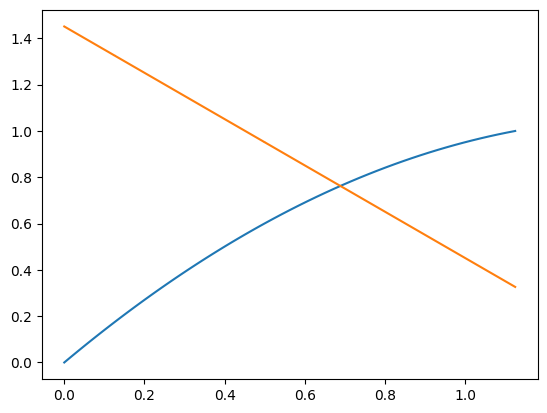

In [103]:
m = 4
p = 2
k = 0
L = 2

neval = 30
x = np.linspace(0,2, m+1)
x = [ i**2*L/m**2 for i in range(0,m) ]
mesh = create_mesh(brk = x)
ref_data = create_ref_data(neval, deg = p, integrate = True)
space = create_fe_space(p, k, mesh)
param_map = create_param_map(mesh)


evaluation_points = ref_data['evaluation_points']
quadrature_weight = ref_data['quadrature_weights']

extraction_coefficients = space['extraction_coefficients']

reference_basis = ref_data['reference_basis']
reference_basis_derivatives = ref_data['reference_basis_derivatives']

bc  = [0,1]

def f(x):
    return np.pi**2*np.sin(np.pi**2*x) * np.where(x < 1, 1, -1)

def f2(x):
    return 2**2 * np.pi**2 * np.sin(2* np.pi*x)

A,b = assemble_fe_problem(mesh, space, ref_data, param_map, problem_B, problem_L, bc, lambda x: 1)

print(A[1:-1,1:-1], b[1:-1])
u = np.zeros(space['n'])
u_inner = np.linalg.solve(A[1:-1,1:-1], b[1:-1])
u[1:-1] = u_inner 
u[0] = bc[0]
u[-1] = bc[-1]

x_eval, u_eval, du_dx_eval = evaluate_solution(p,k, neval, u, x)

plt.plot(x_eval, u_eval)
plt.plot(x_eval, du_dx_eval)

Text(0, 0.5, '$f(x)$')

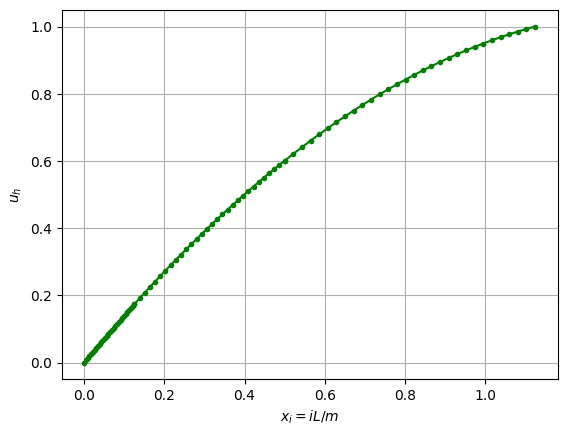

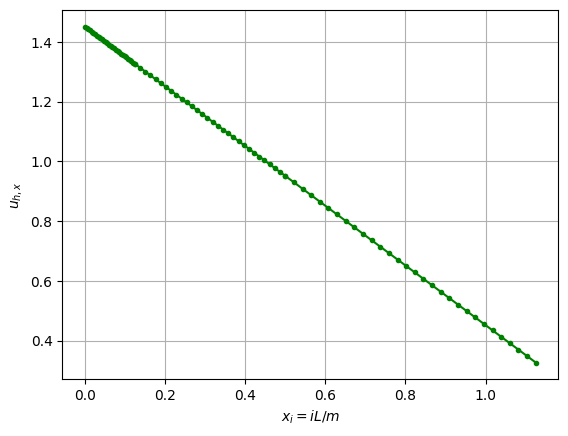

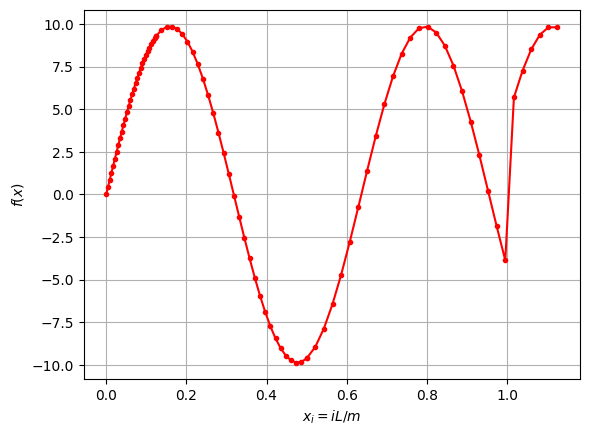

In [104]:
u = np.zeros(space['n'])
u_inner = np.linalg.solve(A[1:-1,1:-1], b[1:-1])
u[1:-1] = u_inner 
u[0] = bc[0]
u[-1] = bc[-1]

x_eval, u_eval, du_dx_eval = evaluate_solution(p, k, neval, u, x)

#plt.plot(x_eval,np.sin(2*np.pi * x_eval) , 'b.-')
plt.plot(x_eval, u_eval, 'g.-')
plt.grid()
plt.xlabel(r'$x_i = i L/m$')
plt.ylabel(r'$u_{h}$')

plt.figure()
plt.plot(x_eval, du_dx_eval, 'g.-')
#plt.plot(x_eval,2*np.pi * np.cos(2*np.pi * x_eval) , 'b.-')
plt.grid()
plt.xlabel(r'$x_i = i L/m$')
plt.ylabel(r'$u_{h,x}$')

plt.figure()
plt.plot(x_eval, f(x_eval), 'r.-')
#plt.plot(x_eval,4*np.pi**2 * np.sin(2*np.pi * x_eval) , 'b.-')
plt.grid()
plt.xlabel(r'$x_i = i L/m$')
plt.ylabel(r'$f(x)$')


From before we recall the partition of unity 
$$
\sum_{i=1}^n N_{i}(x) = 1; \quad \forall x \in \Omega
$$
Compute sum of row  i 
\begin{align*}
\sum_{j=1}^n B(N_{i}, N_j) &= \sum_{j=1}^n \int_{\Omega} N_{i,x} N_{j,x} dx = \int_{\Omega} N_{i,x} \sum_{j=1}^n {} N_{j,x} \overset{\text{linearity of }\frac{d}{dx}}{=} \int_{\Omega} N_{i,x} \frac{d}{dx} \left(\sum_{j=1}^n {} N_{j} \right) \\
&\overset{\text{partition of unity}}{=} \int_{\Omega} N_{i,x} \frac{d}{dx} \left(1\right) = 0
\end{align*}

Notice that our Bilinear form $B$ is symmetric, therefore $\bar{A}$ is also symmertric. And by the fact that every row sum is equal to and that $\bar{A}$ is symmetric the column sums must also be equal to zero.